# **Ensemble**

In [2]:
import pandas as pd
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [3]:
cancer=load_breast_cancer()

df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names) 
df["class"] = cancer.target 
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,class
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


![image.png](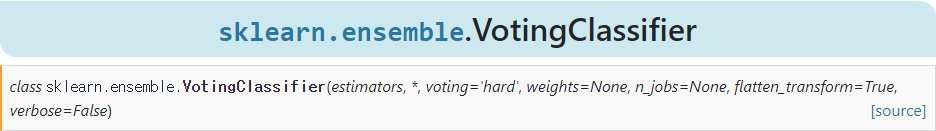!)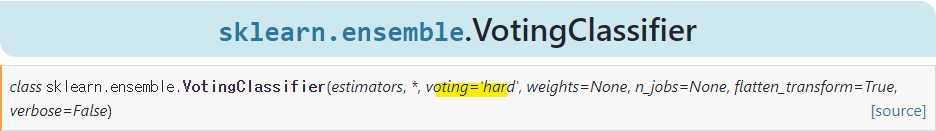

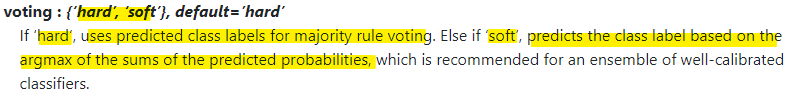

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(df.iloc[:,:-1], df.iloc[:,-1],test_size=0.3,random_state=100)

lr_clf=LogisticRegression(max_iter=10000)
nb_clf=GaussianNB()
# knn_clf=KNeighborsClassifier(n_neighbors=8)

vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('NB',nb_clf)],voting='soft')

vo_clf.fit(X_train,Y_train)
Y_pred=vo_clf.predict(X_test)
print('Voting Classifier Accuracy : {0:.4f}'.format(accuracy_score(Y_test,Y_pred)))

Voting Classifier Accuracy : 0.9415


In [5]:
classifiers=[lr_clf,nb_clf]

for clf in classifiers:
    clf.fit(X_train,Y_train)
    y_pred=clf.predict(X_test)
    acc = accuracy_score(Y_test, y_pred)
    print('{} 정확도: {:.4f}'.format(clf,acc))

LogisticRegression(max_iter=10000) 정확도: 0.9532
GaussianNB() 정확도: 0.9240


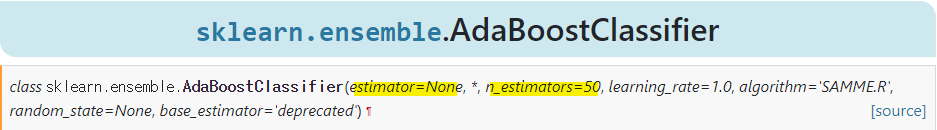

# **Adaptive Boosting**

In [6]:
# 가장 기본적인 AdaBoost
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, Y_train) 
y_pred=clf.predict(X_test)
print(accuracy_score(Y_test, y_pred))

0.9532163742690059


In [7]:
# DecisionTree를 활용한 Adaboost
tree_model = DecisionTreeClassifier(max_depth=3)
clf = AdaBoostClassifier(estimator = tree_model, n_estimators=10, random_state=0)
clf.fit(X_train, Y_train) 
y_pred=clf.predict(X_test)
print(accuracy_score(Y_test, y_pred))

0.9707602339181286


In [8]:
# 추정 횟수를 증가시킨 AdaBoost
tree_model = DecisionTreeClassifier(max_depth=3)
clf = AdaBoostClassifier(estimator = tree_model, n_estimators=50, random_state=0)
clf.fit(X_train, Y_train) 
y_pred=clf.predict(X_test)
print(accuracy_score(Y_test, y_pred))

0.9590643274853801


# **퀴즈 1**

*   make_moons 데이터에 대하여, 현재까지 배운 여러 가지 분류 알고리즘을 Ensemble하여 Test set 성능을 평가하시오. (2종류 이상)





In [26]:
from sklearn.datasets import make_moons
from sklearn.svm import SVC
X, y = make_moons(n_samples=100, noise=0.25, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [27]:
lr_clf=LogisticRegression(max_iter=10000)
nb_clf=GaussianNB()
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('NB',nb_clf)],voting='soft')
vo_clf.fit(X_train,y_train)
Y_pred=vo_clf.predict(X_test)
print('Voting Classifier Accuracy : {0:.4f}'.format(accuracy_score(y_test,Y_pred)))

Voting Classifier Accuracy : 0.8400


In [28]:
lr_clf=LogisticRegression(max_iter=10000)
nb_clf=GaussianNB()
vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('NB',nb_clf)],voting='hard')
vo_clf.fit(X_train,y_train)
Y_pred=vo_clf.predict(X_test)
print('Voting Classifier Accuracy : {0:.4f}'.format(accuracy_score(y_test,Y_pred)))

Voting Classifier Accuracy : 0.8400


In [29]:
lr_clf=LogisticRegression(max_iter=1000)
nb_clf=GaussianNB()
Decision_Tree = DecisionTreeClassifier()


vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('NB',nb_clf),('DT',Decision_Tree)],voting='soft')

vo_clf.fit(X_train,y_train)
y_pred=vo_clf.predict(X_test)
print('Voting Classifier Accuracy : {0:.4f}'.format(accuracy_score(y_test,y_pred)))

Voting Classifier Accuracy : 0.8800


In [30]:
lr_clf=LogisticRegression(max_iter=1000)
nb_clf=GaussianNB()
Decision_Tree = DecisionTreeClassifier()

vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('NB',nb_clf),('DT',Decision_Tree)],voting='hard')

vo_clf.fit(X_train,y_train)
y_pred=vo_clf.predict(X_test)
print('Voting Classifier Accuracy : {0:.4f}'.format(accuracy_score(y_test,y_pred)))

Voting Classifier Accuracy : 0.8400


In [31]:
svm = SVC(kernel='poly', C = 3,degree=3, probability=True)
lr_clf=LogisticRegression(max_iter=1000)
nb_clf=GaussianNB()
Decision_Tree = DecisionTreeClassifier()

vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('NB',nb_clf),('DT',Decision_Tree),('svm',svm)],voting='soft')

vo_clf.fit(X_train,y_train)
y_pred=vo_clf.predict(X_test)
print('Voting Classifier Accuracy : {0:.4f}'.format(accuracy_score(y_test,y_pred)))

Voting Classifier Accuracy : 0.9200


In [32]:
svm = SVC(kernel='poly', C = 3,degree=3, probability=True)
lr_clf=LogisticRegression(max_iter=1000)
nb_clf=GaussianNB()
Decision_Tree = DecisionTreeClassifier()

vo_clf=VotingClassifier(estimators=[('LR',lr_clf),('NB',nb_clf),('DT',Decision_Tree),('svm',svm)],voting='hard')

vo_clf.fit(X_train,y_train)
y_pred=vo_clf.predict(X_test)
print('Voting Classifier Accuracy : {0:.4f}'.format(accuracy_score(y_test,y_pred)))

Voting Classifier Accuracy : 0.8400
